# Employees Turnover rate Prediction using ML model

__Employee turnover__ refers to the total number of employees who leave a company over a certain time period. It includes those who exit voluntarily as well as employees who are fired or laid off—that is, involuntary turnover. High turnover can be costly and disruptive to a business, so it's important to understand what causes it and how to reduce it.

This project aims to build a Machine Learning model to analyze various factors that contribute to Employee Turnover including job satisfaction, last evaluation, number of projects, average monthly hours, time spent in company, accidents at workplace, promotion in 5 years, department and salary.

Here the variable 'Left' is used to indicate whether an employee stay or leave an organization.

__Steps performed to build the model:-__

1.	Perform data quality check by checking for missing values if any.                                                       
2.	Understand what factors contributed most to employee turnover by EDA.                                                   
3.	Perform clustering of Employees who left based on their satisfaction and evaluation.                                   
4.	Handle the left Class Imbalance using SMOTE technique.                                                                 
5.	Perform k-fold cross-validation model training and evaluate performance.                                               
6.	Identify the best model and justify the evaluation metrics used.                                                      
7.	Suggest various retention strategies for targeted employees.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('empp1.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

We can infer from above output that there is no null value present in our data.

# Univariate Analysis

In [6]:
df['number_project'].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

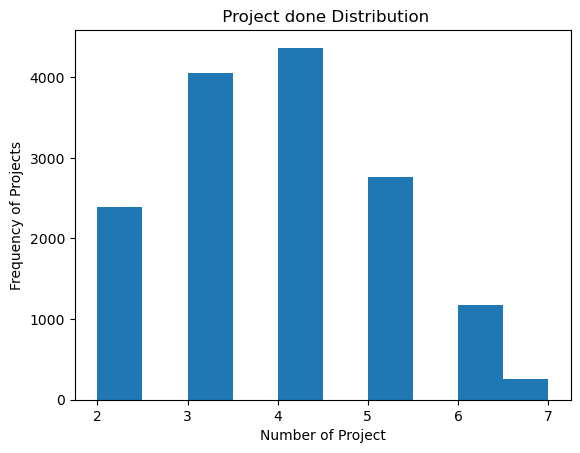

In [7]:
plt.hist(df['number_project'])
plt.xlabel('Number of Project')
plt.ylabel('Frequency of Projects')
plt.title(' Project done Distribution')
plt.show()

Number of projects seems to be almost normally distributed with mean projects near to 4.

In [8]:
df['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

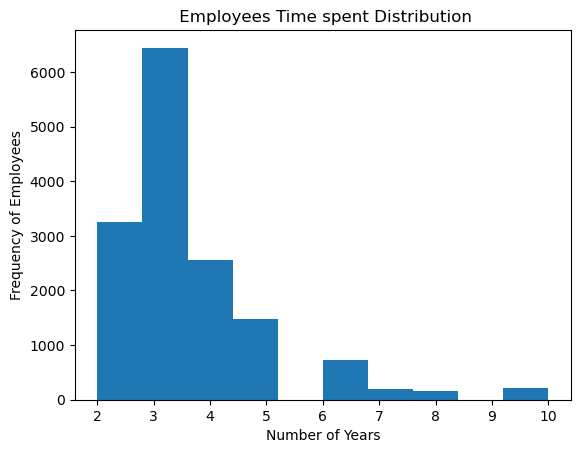

In [9]:
plt.hist(df['time_spend_company'])
plt.xlabel('Number of Years')
plt.ylabel('Frequency of Employees')
plt.title(' Employees Time spent Distribution')
plt.show()

From the above plot we can see that there are only few people who have worked for more than 5 years.

In [10]:
df['Work_accident'].unique()

array([0, 1], dtype=int64)

In [11]:
df['left'].unique()

array([1, 0], dtype=int64)

In [12]:
df['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [13]:
print(df['department'].unique())
print('The number of Departments in the organization are: ',df['department'].nunique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
The number of Departments in the organization are:  10


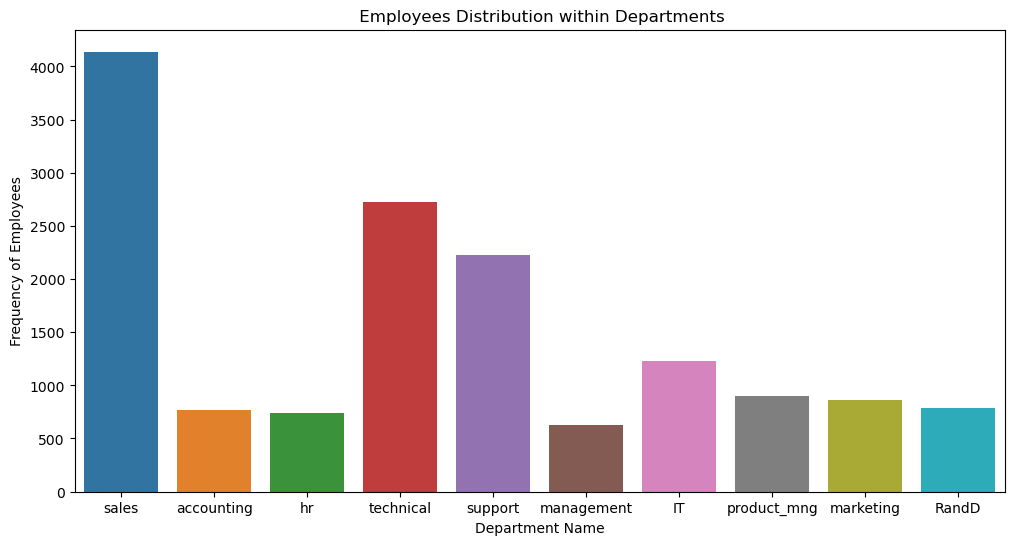

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(df['department'])
plt.xlabel('Department Name')
plt.ylabel('Frequency of Employees')
plt.title(' Employees Distribution within Departments')
plt.show()

Above distribution shows that maximum people work in Sales Department and minimum in Management.

In [15]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

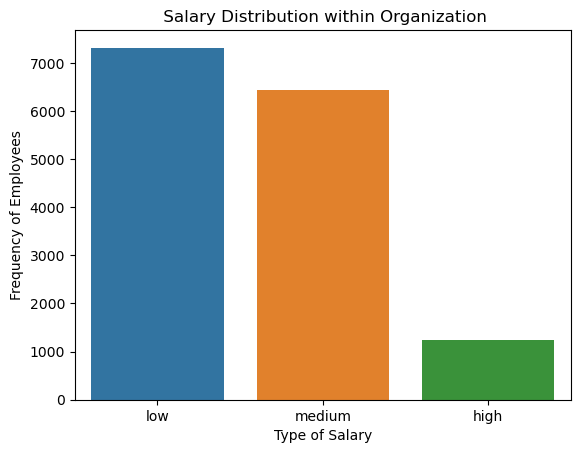

In [16]:
sns.countplot(df['salary'])
plt.xlabel('Type of Salary')
plt.ylabel('Frequency of Employees')
plt.title(' Salary Distribution within Organization')
plt.show()

Above distribution shows that maximum people working in organization have low salary and small portion of employees have High salary.

# Bi-Variate Analysis

<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

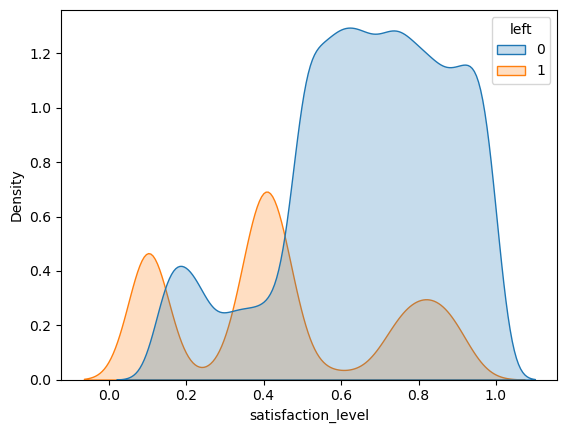

In [17]:
sns.kdeplot(data=df,x='satisfaction_level',hue='left',fill=True)

Above plot shows that employees having low satisfaction tends to leave organization more.

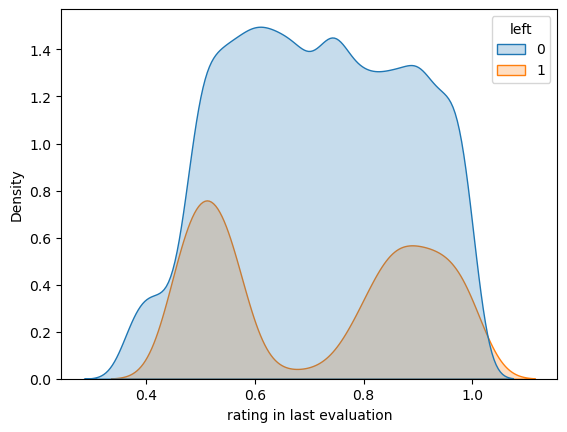

In [18]:
sns.kdeplot(data=df,x='last_evaluation',hue='left',fill=True)
plt.xlabel('rating in last evaluation')
plt.show()

Above plot shows as the ratings in last evaluation increases the tendency of employee to leave organiztion decreases. But employees getting very high ratings also tends to leave.

<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

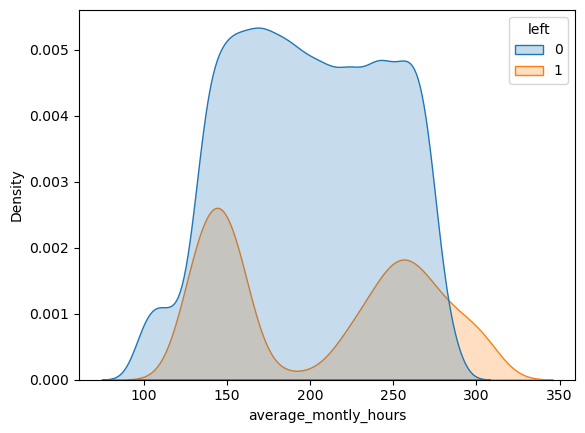

In [19]:
sns.kdeplot(data=df,x='average_montly_hours',hue='left',fill=True)

Above plot shows the employees who are leaving are usually working for longer hours than those who are staying.

<AxesSubplot:xlabel='time_spend_company', ylabel='Density'>

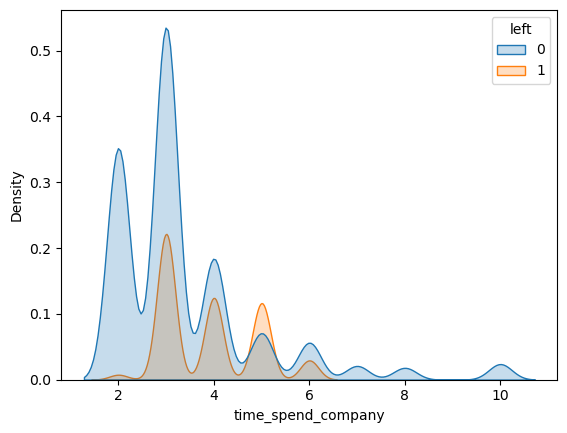

In [20]:
sns.kdeplot(data=df,x='time_spend_company',hue='left',fill=True)

Above plot shows that employees who are leaving have usually spent lesser years than those who are staying.

Work_accident  left
0              0       73.484022
               1       26.515978
1              0       92.208391
               1        7.791609
Name: left, dtype: float64

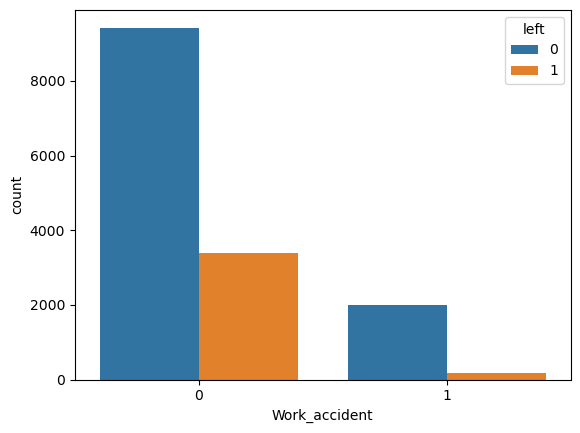

In [21]:
sns.countplot(df['Work_accident'],hue=df['left'])
df.groupby(['Work_accident']).left.value_counts(sum)*100

Above plot shows that more accidents are done by employees who are not leaving the organization than those who are leaving.

promotion_last_5years  left
0                      0       75.803815
                       1       24.196185
1                      0       94.043887
                       1        5.956113
Name: left, dtype: float64

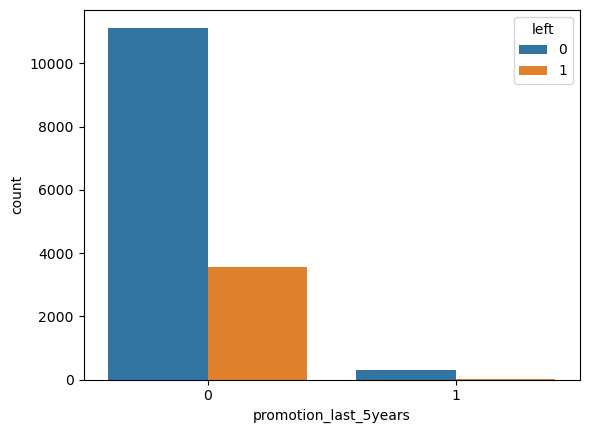

In [22]:
sns.countplot(df['promotion_last_5years'],hue=df['left'])
df.groupby(['promotion_last_5years']).left.value_counts(sum)*100

Above plot shows that there is greater number of employees leaving who have not received promotion in the last 5 years.

department   left
IT           0       77.750611
             1       22.249389
RandD        0       84.625159
             1       15.374841
accounting   0       73.402868
             1       26.597132
hr           0       70.906631
             1       29.093369
management   0       85.555556
             1       14.444444
marketing    0       76.340326
             1       23.659674
product_mng  0       78.048780
             1       21.951220
sales        0       75.507246
             1       24.492754
support      0       75.100942
             1       24.899058
technical    0       74.375000
             1       25.625000
Name: left, dtype: float64

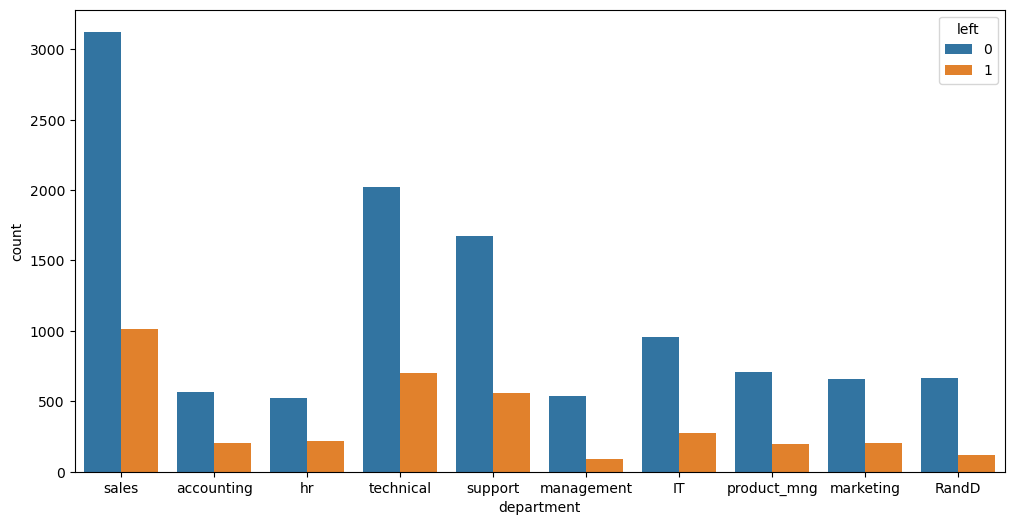

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(df['department'],hue=df['left'])
df.groupby(['department']).left.value_counts(sum)*100

Above plot shows maximum percentage of Employees leaving are from HR department and minimum are from Management.

salary  left
high    0       93.371059
        1        6.628941
low     0       70.311646
        1       29.688354
medium  0       79.568725
        1       20.431275
Name: left, dtype: float64

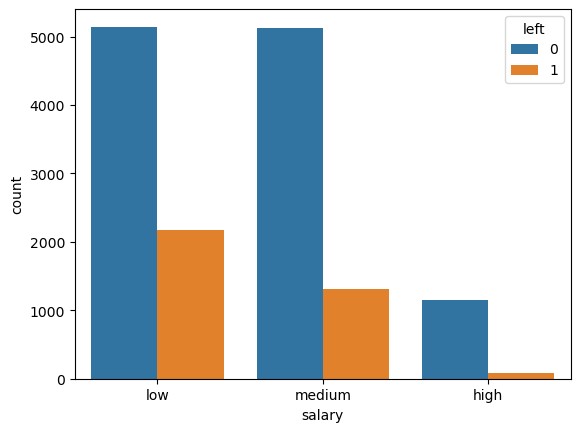

In [24]:
sns.countplot(df['salary'],hue=df['left'])
df.groupby(['salary']).left.value_counts(sum)*100

Above plot shows maximum percentage of Employees leaving are having LOW salaries and minimum are from employees with HIGH salaries.

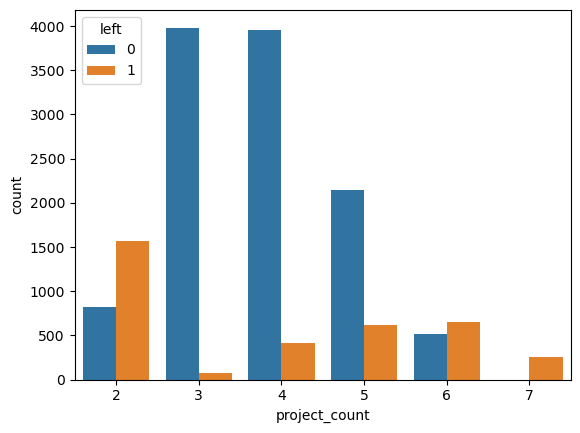

In [25]:
sns.countplot(data=df,x='number_project',hue='left')
plt.xlabel('project_count')
plt.show()

From the above plot we can infer that people who have low project counts seems to be leaving organization more than those having higher number of projects. But also when number of projects exceed beyond 5 tendency to leave again start increasing.

# Multi Variate Analysis

<AxesSubplot:>

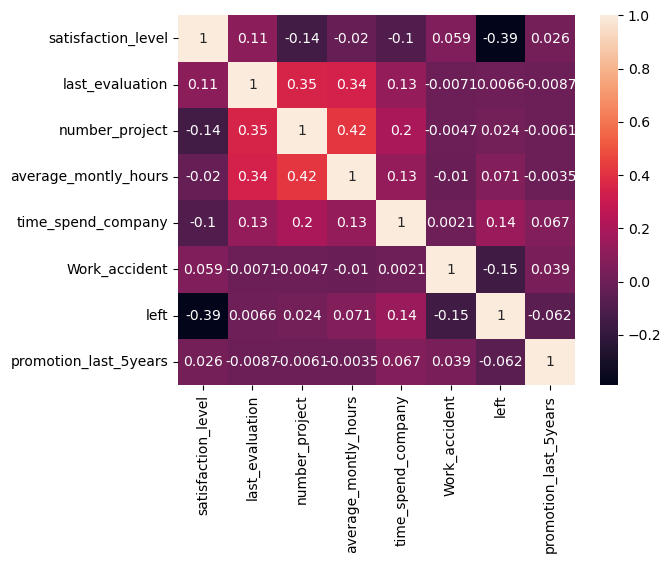

In [26]:
sns.heatmap(df.corr(),annot=True)

From the above plot we can infer that:  

1) There is good correlation between Average montly Hours and Number of Projects Done.           
2) There is good correlation between employee who left the company and Satisfaction Level.


In [27]:
#The below data shows factors responsible for Employee turnover in descending order according to pearson correlation.
a=df.corr()
a['left'].round(2).abs().sort_values(ascending=False)

left                     1.00
satisfaction_level       0.39
Work_accident            0.15
time_spend_company       0.14
average_montly_hours     0.07
promotion_last_5years    0.06
number_project           0.02
last_evaluation          0.01
Name: left, dtype: float64

# Clustering of Employees who left Oragnzation Using K Means

In [28]:
#Selecting only those employees who have left the company.
df2=df[df['left']==1]

In [29]:
df3=df2[['satisfaction_level','last_evaluation']].values

In [30]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()
df3=scaler.fit_transform(df3)

In [32]:
df3

array([[-0.22773328, -0.9517667 ],
       [ 1.36379989,  0.71788783],
       [-1.25086175,  0.81907901],
       ...,
       [-0.26562693, -0.9517667 ],
       [-1.25086175,  1.22384375],
       [-0.26562693, -1.00236229]])

In [33]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

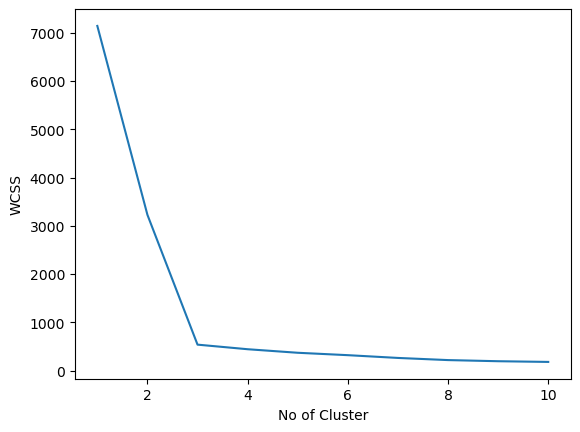

In [34]:
#Finding optimal number of Clusters using Elbow method.
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=99)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')

Here from the above plot we can say that optimal number of Clusters is 3

In [35]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=99)
y_means=kmeans.fit_predict(df3)

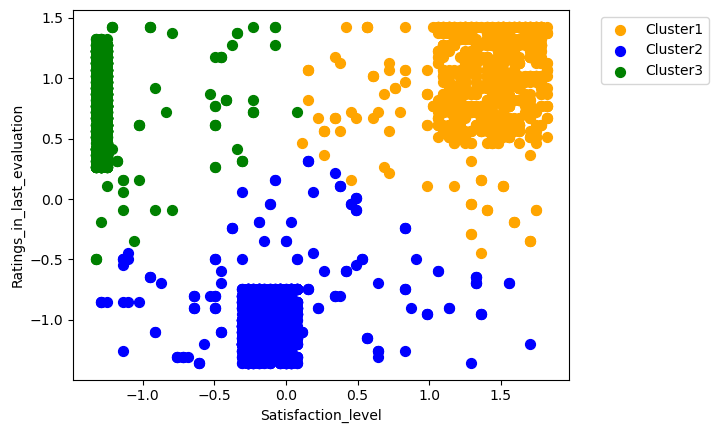

In [36]:
plt.scatter(df3[y_means==0,0],df3[y_means==0,1],s=50,c='orange',label='Cluster1')
plt.scatter(df3[y_means==1,0],df3[y_means==1,1],s=50,c='b',label='Cluster2')
plt.scatter(df3[y_means==2,0],df3[y_means==2,1],s=50,c='g',label='Cluster3')
plt.xlabel('Satisfaction_level')
plt.ylabel('Ratings_in_last_evaluation')
plt.legend(bbox_to_anchor=(1.05,1))

From the above plot we can infer that:                                                                                      
1) Cluster1 consists of Employees who have received high ratings in last evaluation and are highly satisfed but still left the company. These are our target employees as they have received very high rating due to their high performance and focus should be made on retaining these employees.            

2) Cluster2 consists of Employees who have received medium ratings in last evaluation and are mediumly satisfed but still left the company. These sholud also come in our Target employees because these employees can improve and reach high performance in future with proper guidance and training.

3) Cluster3 consists of Employees who have received high ratings in last evaluation and are not much satisfed. These are less important employees as they might be looking for better opportunities outside the Organization.

# Data Preparation For Model Building

<AxesSubplot:xlabel='left', ylabel='count'>

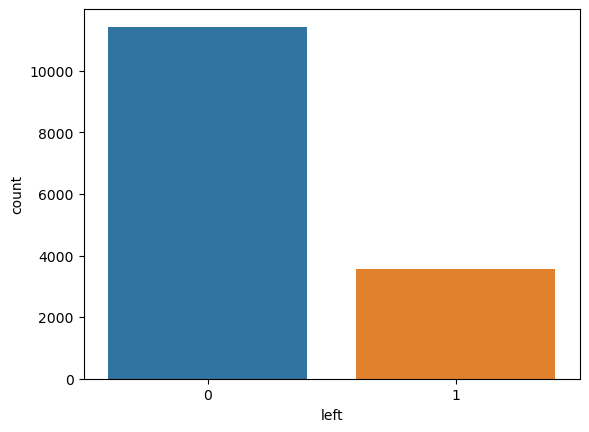

In [37]:
#Checking class imbalance in Target variable ('left')
sns.countplot(df['left'])

Clearly there is class imbalance. We will correct it using SMOTE technique.

In [38]:
#Checkinh datatype of all the columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [39]:
#Separating Categorical Variable from Numerical Variable
import numpy as np
numeric_data=df.select_dtypes(include=[np.number])
categorical_data=df.select_dtypes(exclude=[np.number])

In [40]:
numeric_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [41]:
categorical_data.head()

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [42]:
#Converting Categorical data to Numerical by creating Dummies.
categorical_data=pd.get_dummies(data=categorical_data,columns=['department','salary'],drop_first=True)
categorical_data.head()

,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0


In [43]:
sca_data=numeric_data.drop(['Work_accident','left','promotion_last_5years'],axis=1)
sca_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [44]:
non_sca=numeric_data[['Work_accident','left','promotion_last_5years']]
non_sca.head()

,Work_accident,left,promotion_last_5years
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [45]:
#Applying scaling on required data.
scaler=StandardScaler()
sca_data=pd.DataFrame(scaler.fit_transform(sca_data),columns=sca_data.columns)
sca_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235
1,0.752814,0.840707,0.971113,1.220423,1.713436
2,-2.022479,0.957554,2.593763,1.420657,0.343655
3,0.431041,0.899131,0.971113,0.439508,1.028546
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235


In [46]:
#Concatinating numerical and categorical dataframes.
df_final=pd.concat([sca_data,non_sca,categorical_data],axis=1)
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,1,0,0,0,0,0,0,0,1,0,0,1,0


# Using Logistics Regression without applying SMOTE technique

In [47]:
#Separating Features and Target variable
X=df_final.drop(['left'],axis=1)
Y=df_final['left']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#Done stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=123,stratify=Y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11999, 18)
(11999,)
(3000, 18)
(3000,)


Stratified splitting is done to keep same percentage of each class in each split.

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lm=LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [52]:
pred_lm=lm.predict(x_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [54]:
print('Logistic Regression Accuracy score is:',metrics.accuracy_score(pred_lm,y_test)*100,"%")

Logistic Regression Accuracy score is: 78.96666666666667 %


In [55]:
confusion_matrix(pred_lm,y_test)

array([[2108,  453],
       [ 178,  261]], dtype=int64)

In [56]:
print(classification_report(pred_lm,y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2561
           1       0.37      0.59      0.45       439

    accuracy                           0.79      3000
   macro avg       0.64      0.71      0.66      3000
weighted avg       0.84      0.79      0.81      3000



We will use recall as a metrics to evaluate our model as we want all the employees who will be leaving to be identified correctly. We are doing it at cost of sacrificing precision so that most of the Employees who would be leaving can be identified correctly even if some employees who would not leave would be wrongly tagged as leaving.

As we can see our Simple Logistic model is having very low recall for Employees leaving so we will try to improve it in upcoming models.

# Applying SMOTE to Data

In [57]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [58]:
print(x_train.shape)
print(y_train.shape)

(11999, 18)
(11999,)


In [59]:
#Resampling data to balance class with less data.
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [60]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(18284, 18)
(18284,)


Clearly some data has been added after applying SMOTE to handle class imbalance.

In [61]:
lm1=LogisticRegression()

In [62]:
#Again fitting the data in Logistics Regression model.
lm1.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [63]:
pred_lm1=lm1.predict(x_test)
print('Logistic Regression Accuracy score is:',metrics.accuracy_score(pred_lm1,y_test)*100,"%")

Logistic Regression Accuracy score is: 76.93333333333334 %


In this case the efficiency of the model has been slightly decreased after applying SMOTE technique. Without SMOTE it was 78.96 %

In [64]:
confusion_matrix(pred_lm1,y_test)

array([[1728,  134],
       [ 558,  580]], dtype=int64)

In [65]:
print(classification_report(y_test,pred_lm1))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      2286
           1       0.51      0.81      0.63       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000



Although the efficiency got reduced after applying SMOTE but recall of class with less data has been considerably increased. Earlier it was 0.59.

In [66]:
#Examining the coefficient of variables to check their contribution in classification.
r=lm1.coef_.flatten()
coeffs=r.tolist()
coeffs.sort()

In [67]:
a=X.columns

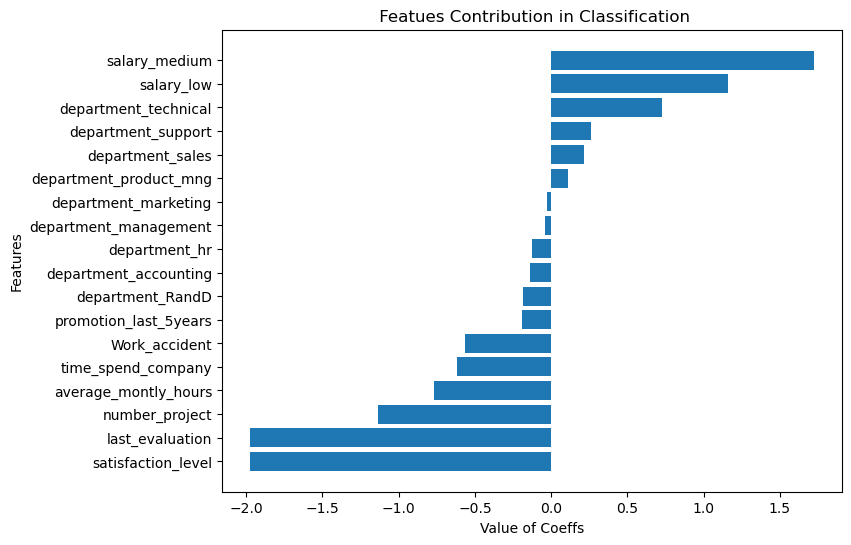

In [68]:
plt.figure(figsize=(8,6))
plt.barh(a,coeffs)
plt.xlabel('Value of Coeffs')
plt.ylabel('Features')
plt.title(' Featues Contribution in Classification')
plt.show()

From the above plot we can infer that top factors contributing in the employee turnover are:                                   
1) Satisfaction Level                                                                                                       
2) Last Evaluation                                                                                                        
3) Medium Salary                                                                                                           
4) Number of Projects done                                                                                                 
5) Low salary

# Applying Random Forest Algorithm to data

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf=RandomForestClassifier(criterion='gini',max_depth=7,n_estimators=200,random_state=77)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=77)

In [71]:
pred_rf=rf.predict(x_test)

In [72]:
print(confusion_matrix(y_test,pred_rf))

[[2275   11]
 [  64  650]]


In [73]:
print('Random Forest Accuracy score is:',metrics.accuracy_score(y_test,pred_rf)*100,"%")

Random Forest Accuracy score is: 97.5 %


In [74]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2286
           1       0.98      0.91      0.95       714

    accuracy                           0.97      3000
   macro avg       0.98      0.95      0.96      3000
weighted avg       0.98      0.97      0.97      3000



We have improved our recall from last instance. In Logistic model with smote data it was 0.8 for class represented by '1'.

# Applying XG Boost Algorithm to data

In [75]:
import xgboost as xgb
from xgboost import XGBClassifier

In [76]:
boost=XGBClassifier(random_state=0)
boost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [77]:
pred_boost=boost.predict(x_test)
pred_boost

array([0, 1, 0, ..., 0, 0, 1])

In [78]:
print(confusion_matrix(y_test,pred_boost))

[[2269   17]
 [  20  694]]


In [79]:
print('XGBoost Accuracy score is:',metrics.accuracy_score(y_test,pred_boost)*100,"%")

XGBoost Accuracy score is: 98.76666666666667 %


In [80]:
print(classification_report(y_test,pred_boost))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.97      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



We have receieved the highest recall for Employees leaving using XGBoost algorithm. So we will be finalising this model to classify our data.The accuracy is also highest in this case.

# Plotting ROC-AUC curve

In [81]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [82]:
log_fpr,log_tpr,threshold=roc_curve(y_test,pred_lm)
auc_log=auc(log_fpr,log_tpr)

In [83]:
log_fpr1,log_tpr1,threshold1=roc_curve(y_test,pred_lm1)
auc_log1=auc(log_fpr1,log_tpr1)

In [84]:
rf_fpr,rf_tpr,threshold=roc_curve(y_test,pred_rf)
auc_rf=auc(rf_fpr,rf_tpr)

In [85]:
boost_fpr1,boost_tpr1,threshold1=roc_curve(y_test,pred_boost)
auc_boost1=auc(boost_fpr1,boost_tpr1)

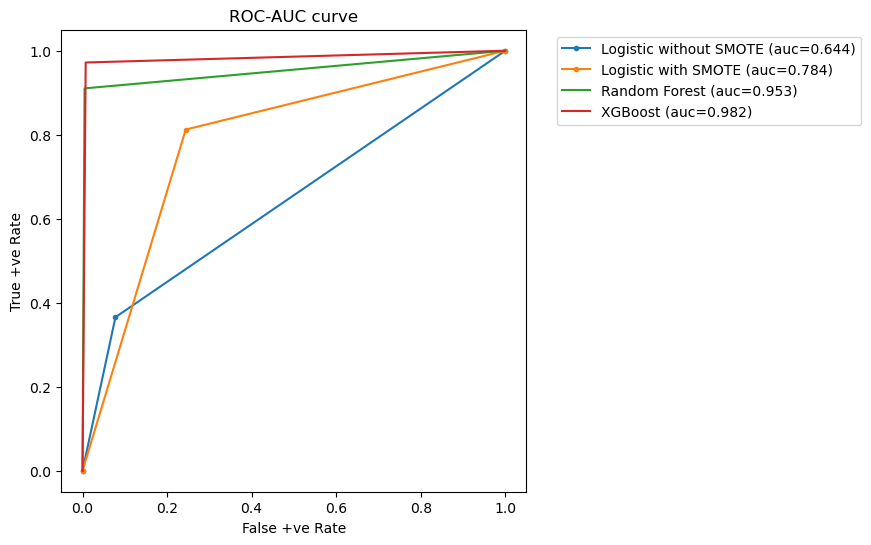

In [86]:
plt.figure(figsize=(6,6))
plt.plot(log_fpr,log_tpr,marker='.',label='Logistic without SMOTE (auc=%0.3f)' %auc_log)
plt.plot(log_fpr1,log_tpr1,marker='.',label='Logistic with SMOTE (auc=%0.3f)' %auc_log1)
plt.plot(rf_fpr,rf_tpr,linestyle='-',label='Random Forest (auc=%0.3f)' %auc_rf)
plt.plot(boost_fpr1,boost_tpr1,linestyle='-',label='XGBoost (auc=%0.3f)' %auc_boost1)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC-AUC curve')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

The value of Area Under Curve (AUC) shows the performance of the model over different threshold values used by model for classification. So greater the AOC better would be the model. As the Area Under Curve (AUC) is greatest for model with XGBoost algorithm so we can say XGBoost is the best Classification model.

In [87]:
#!pip install xgboost

# Applying K fold on all models

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [89]:
classification_models=[]
classification_models.append(('Logistic',LogisticRegression()))
classification_models.append(('Random Forest',RandomForestClassifier(criterion='gini',max_depth=7,n_estimators=200,random_state=77)))
classification_models.append(('XGBoost',XGBClassifier()))

In [90]:
for name,models in classification_models:
    kfold =KFold(n_splits=5,random_state=9,shuffle=True)
    result=cross_val_score(models,X,Y,cv=kfold,scoring='accuracy')
    print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Logistic: Mean Accuracy = 79.16% - SD Accuracy = 0.25%
Random Forest: Mean Accuracy = 97.57% - SD Accuracy = 0.27%
XGBoost: Mean Accuracy = 98.69% - SD Accuracy = 0.16%


From K-Fold technique we can conclude that XGBoost has the best performance among the three models.

# Separating Employees according to Risk associated with them

In [91]:
#Obtaining probability values for all employees using XGBoost model.
pred_pr=boost.predict_proba(X)
pred_pr

array([[1.1709332e-03, 9.9882907e-01],
       [3.3697188e-02, 9.6630281e-01],
       [1.5676022e-04, 9.9984324e-01],
       ...,
       [5.6954026e-03, 9.9430460e-01],
       [1.3293028e-03, 9.9867070e-01],
       [1.2331426e-02, 9.8766857e-01]], dtype=float32)

In [92]:
pb=pred_pr
proab=pb.tolist()

In [93]:
df['probability']=1

In [94]:
#Adding probability column in dataset.
for i in range(14999):
    df['probability'][i]=proab[i][1]
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,probability
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.998829
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.966303
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.999843
3,0.72,0.87,5,223,5,0,1,0,sales,low,0.828187
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.993935
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0.997210
14995,0.37,0.48,2,160,3,0,1,0,support,low,0.995534
14996,0.37,0.53,2,143,3,0,1,0,support,low,0.994305
14997,0.11,0.96,6,280,4,0,1,0,support,low,0.998671


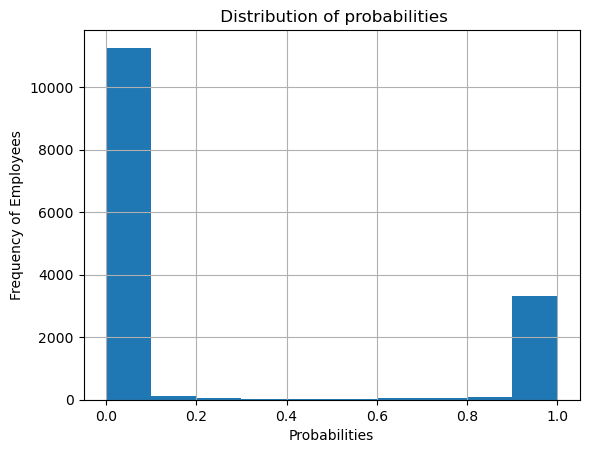

In [95]:
#Plotting distribution of probability among employees
df['probability'].hist()
plt.xlabel('Probabilities')
plt.ylabel('Frequency of Employees')
plt.title(' Distribution of probabilities')
plt.show()

In [96]:
df['Zone']=1

In [97]:
#Segragating employees in various risk zone according to probabilities.
for i in range (14999):
    h=float(df['probability'][i])
    if h<=0.2:
        df['Zone'][i]='Safe Zone'
    elif h>0.2 and h<=0.6:
        df['Zone'][i]='Low Risk Zone'
    elif h>0.6 and h<=0.9:
        df['Zone'][i]='Medium Risk Zone'
    else:
        df['Zone'][i]='High Risk Zone'

In [98]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,probability,Zone
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.998829,High Risk Zone
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.966303,High Risk Zone
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.999843,High Risk Zone
3,0.72,0.87,5,223,5,0,1,0,sales,low,0.828187,Medium Risk Zone
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.993935,High Risk Zone


In [99]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [100]:
df['Zone'].value_counts()

Safe Zone           11366
High Risk Zone       3308
Medium Risk Zone      201
Low Risk Zone         124
Name: Zone, dtype: int64

Initially there were 11428 employees in Safe Zone or who were not leaving and our model has identified 99.45% among them as safe. Rest of the employees have been placed in various risk categories.

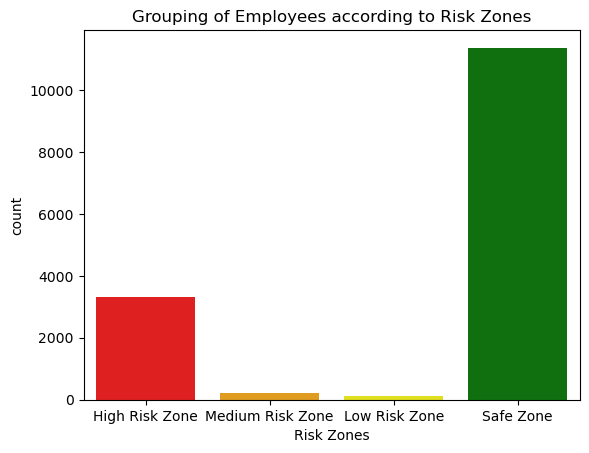

In [101]:
sns.countplot(df['Zone'],palette=['red','orange','yellow','green'])
plt.xlabel('Risk Zones')
plt.title('Grouping of Employees according to Risk Zones')
plt.show()

# Employees Retention Stratergies:

Salary - Most of the time an employee leave an organization is because he/she is getting salary boost by joining other Organization. So Focus should be made on providing competitive salaries to employees.

Average Monthly Hours - Every employee needs a work life balance. So focus should be made to keep check on employees whose working hours are exceeding beyond certain optimal level. Proper training and guidance should be provided to such employees so that they complete their work on time.

Recognition (Promotion) - Lack of recognition also plays a major role in Employee turover. So appropriate salary hikes and promotions should be done to keep employee satisfied and recognised. Also continuous appreciation by Manager would be a boost for employee's motivation.

Work Load (Project Count) - It is the utmost responsibilty of the manager to know the capability of his team members and divide the workload accordingly. Many time employees feel burn out due to high work load which later become reason of them leaving the company.

Opportunity to grow (Time spent) - Every person joins an organization with a goal to grow both Financially and Technically. So ample amount of growth opportunities should be provided to employees so that they stay in organization for longer time.